# Creating local estimates of boundary of basin of attraction

## Model a dynamical system

We model the Lorenz system, which consists of the following three ODEs: 

$$x'=\sigma(y-x) \\
y'=rx-y-xz \\
z'=xy-\beta z$$

In [8]:
import numpy as np
from scipy.integrate import solve_ivp

We set some parameters and do a test simulation to observe the convergence process to a stable equilibrium. The simulation code is referenced from https://github.com/scipython/scipython-maths/blob/master/lorenz/lorenz.py

In [9]:
# Lorenz parameters and initial conditions.
sigma, beta, r = 10, 2.667, 10
x0, y0, z0 = 0, 1, 1.05

# Maximum time point and total number of time points.
tmax, n = 2000, 100000

In [10]:
def lorenz(t, X, sigma, beta, r):
    """The Lorenz equations."""
    x, y, z = X
    xp = sigma*(y - x)
    yp = r*x - y - x*z
    zp = -beta*z + x*y
    return xp, yp, zp

In [11]:
# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, tmax), (x0, y0, z0), args=(sigma, beta, r),dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

After numerically solving the problem, we plot the trajectory.

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
WIDTH, HEIGHT, DPI = 1000, 750, 100

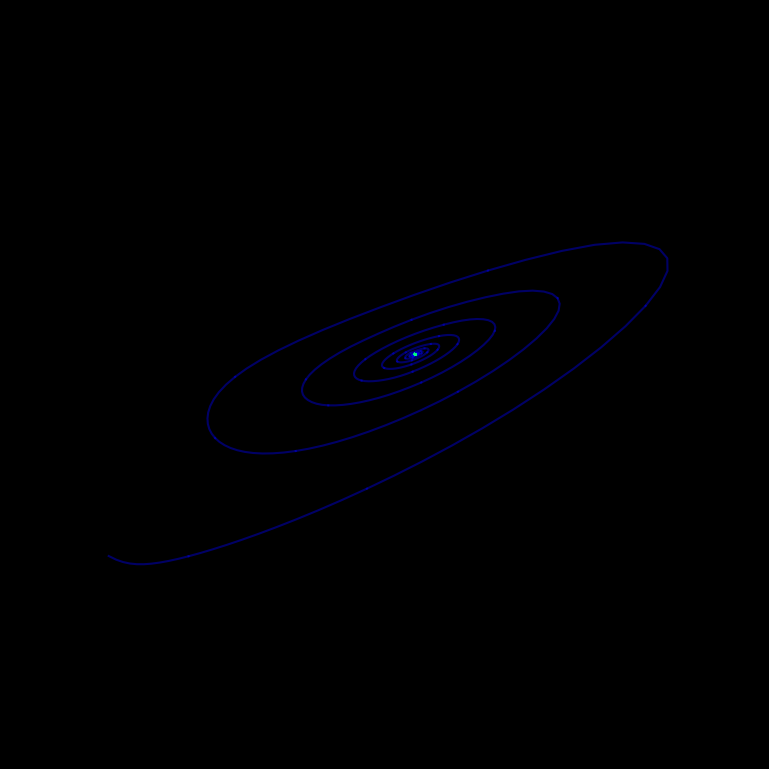

In [14]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
cmap = plt.cm.winter
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.savefig('lorenz_win.png', dpi=DPI)
plt.show()

By the setting of parameters, the system has two stable equilibriums. 

By checking the trace of the trajectory, we could observe that the flow converges to one of them.

## Simulation to collect data

We now form a dataset for training and testing with the following way: We randomly select initial conditions $(x_{0},y_{0},z_{0}) \in (-50,50)\times (-50,50) \times (-50,50)$ and compute the trajectories. We fix a stable equilibrium of interest, and label the points as 1 or -1 depending on whether the trajectory converges to that equilibrium.

## Reproduction of Shena et.al approach using deep neural network